# Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("turboaz.csv")[["Yurush", "Buraxilish ili", "Qiymet"]]
data.head() # displaying few rows

,Yurush,Buraxilish ili,Qiymet
0,366 000 km,1999,12500 AZN
1,102 000 km,2014,31500 $
2,469 700 km,2002,11700 AZN
3,556 680 km,1998,9700 AZN
4,300 000 km,2000,12700 AZN


In [3]:
# defining convert(string to int) function for column 'Yurush'
def yurush_string_to_int(data):
    data['Yurush'] = data['Yurush'].str.replace(' km', '').str.replace(' ', '').astype(int) 

In [4]:
yurush_string_to_int(data) #calling the convert function
data.head() #displaying

,Yurush,Buraxilish ili,Qiymet
0,366000,1999,12500 AZN
1,102000,2014,31500 $
2,469700,2002,11700 AZN
3,556680,1998,9700 AZN
4,300000,2000,12700 AZN


In [5]:
def qiymet_dollar_to_azn(data):
    converted_qiymet = [float(price.replace(' $', '').strip()) * 1.7 if '$' in price else float(price.replace(' AZN', '').strip()) for price in data['Qiymet']]
    data['Qiymet'] = converted_qiymet

In [6]:
qiymet_dollar_to_azn(data)
data.head() 

,Yurush,Buraxilish ili,Qiymet
0,366000,1999,12500.0
1,102000,2014,53550.0
2,469700,2002,11700.0
3,556680,1998,9700.0
4,300000,2000,12700.0


# Visualization

<Axes: xlabel='Yurush', ylabel='Qiymet'>

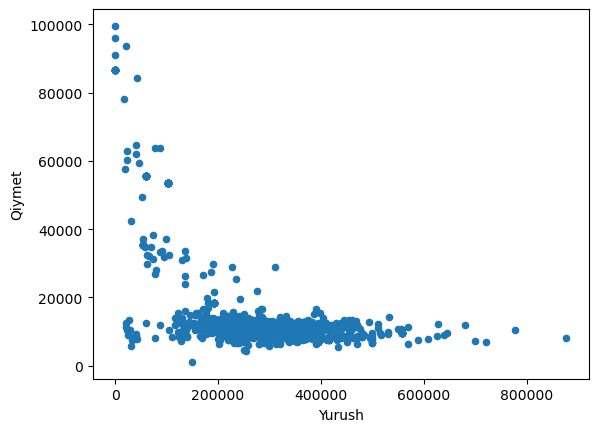

In [7]:
data.plot.scatter(x = "Yurush", y = "Qiymet")

<Axes: xlabel='Buraxilish ili', ylabel='Qiymet'>

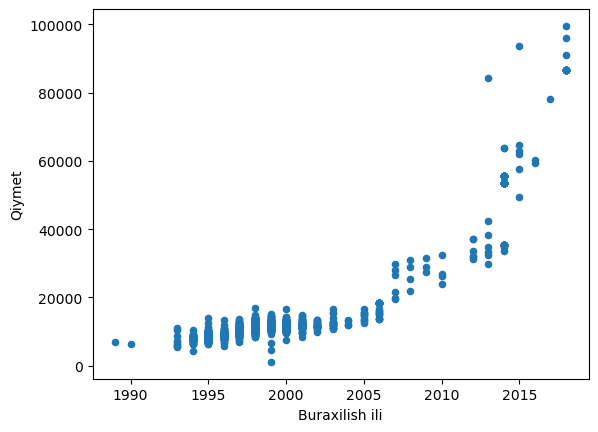

In [8]:
data.plot.scatter(x = "Buraxilish ili", y = "Qiymet")

In [9]:
def three_d_plot(data):
    x1 = data['Yurush'].to_numpy()
    x2 =  data['Buraxilish ili'].to_numpy() 
    y =  data['Qiymet'].to_numpy() 
    
    fig = plt.figure(figsize = (10, 8))
    
    ax = plt.axes(projection ='3d')
    
    ax.scatter(x1, x2, y, c = 'red')
    plt.show()

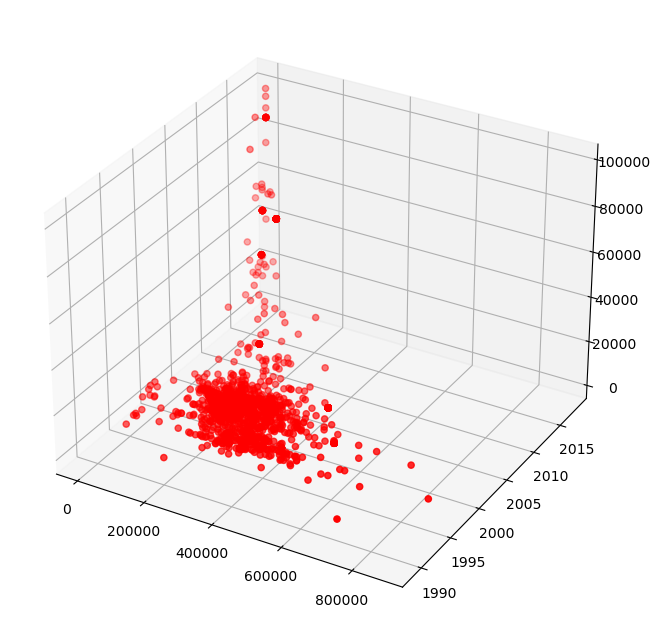

In [10]:
three_d_plot(data)

# Linear Regression 

### Cost Function

In [11]:
x = data.drop(columns=['Qiymet']).values # the values of all columns in data except the 'Qiymet' 
y = data['Qiymet'].values # the values of 'Qiymet' column

m, n = x.shape

theta = np.zeros((n+1))

# for matrix multipication
x_o = np.hstack((np.ones((m, 1)), x))

In [12]:
def multiply_matrix(x, theta):
    return np.dot(x, theta)

In [13]:
def calc_cost(x, y, theta):
    m = len(y)
    hyp_values = multiply_matrix(x, theta)
    squared_errors = (hyp_values - y) ** 2
    total_cost = np.sum(squared_errors) / (2 * m)
    return total_cost

In [14]:
calc_cost(x_o, y, theta)

207350411.8323343

### Normalization

In [15]:
def normalize(x):
    epsilon = 1e-10 # prevent division by zero
    
    sigma = x.std(0)
    
    mean = x.mean(0)
    
    sigma[sigma == 0] += epsilon
    
    normalized_x = (x - mean) / sigma
    
    return normalized_x, mean, sigma

In [16]:
x_normalized, mean, sigma = normalize(x)
x_no = np.hstack((np.ones((m, 1)), x_normalized))

calc_cost(x_no, y, theta)

207350411.8323343

### Gradient Descent

In [17]:
learning_rate = 0.001   
iterations = 10000

In [18]:
def gradient_desc(x, y, theta):
    n = len(y)
    cost_values =[]
    
    for i in range(iterations):
        hypo_cost = multiply_matrix(x, theta) - y
        theta = theta - (learning_rate / n) * np.matmul(x.transpose(), hypo_cost)
        cost_values.append(calc_cost(x, y, theta))
    
    return theta, cost_values

In [19]:
alt, cost_values = gradient_desc(x_no, y, theta)

### Visualization of Cost Function

In [20]:
def cost_function_graph(vals): 
    plt.plot(vals)
    plt.show()

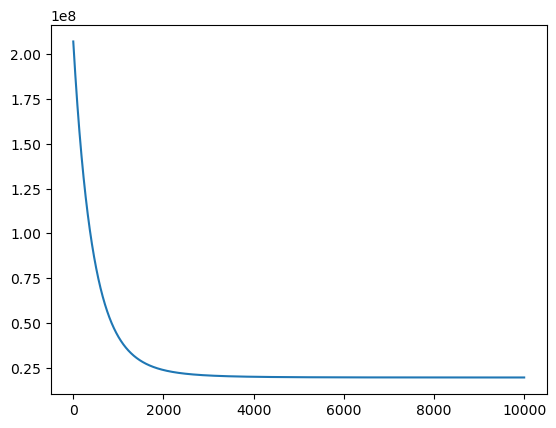

In [21]:
cost_function_graph(cost_values)

### Line of predictions for Qiymet and Buraxilish ili

In [39]:
def year_prediction(x, y, z):
    plt.scatter(x[:, 2], y, color = 'green')
    plt.xlabel('Buraxilish ili')
    plt.ylabel('Qiymet') 
    
    #min and max values of 'Buraxilish ili'
    min_index = x[:,2].argmin()
    max_index = x[:,2].argmax()
    
    x_val = [x[:,2][min_index], x[:,2][max_index]]
    y_val = [np.matmul(x[min_index], z), np.matmul(x[max_index], z)]
    
    # subtracting a constant value from y values
    offset = np.mean(y) - np.mean(y_val)
    y_values_adjusted = [val + offset for val in y_val]
    
    plt.plot(x_val, y_values_adjusted, color = "red")


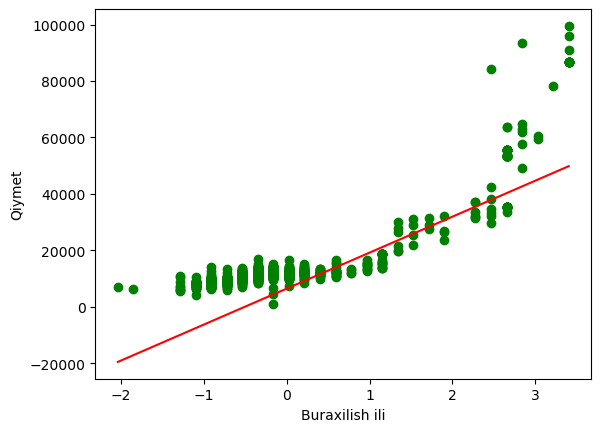

In [40]:
year_prediction(x_no, y, alt)

### Line of predictions for Qiymet and Yurush


In [24]:
def yurush_prediction(x, y):
    
    plt.scatter(x[:, 1], y, color = 'orange')
    plt.xlabel('Yurush')
    plt.ylabel('Qiymet') 
    plt.title('Predicted Line')
    
    #min and max values of 'Yurush'
    min_index = x[:,1].argmin()
    max_index = x[:,1].argmax()
    
    x_value = [x[:,1][min_index], x[:,1][max_index]]
    y_value = 10000  
    
    plt.plot(x_value, [y_value, y_value], color = "purple") 


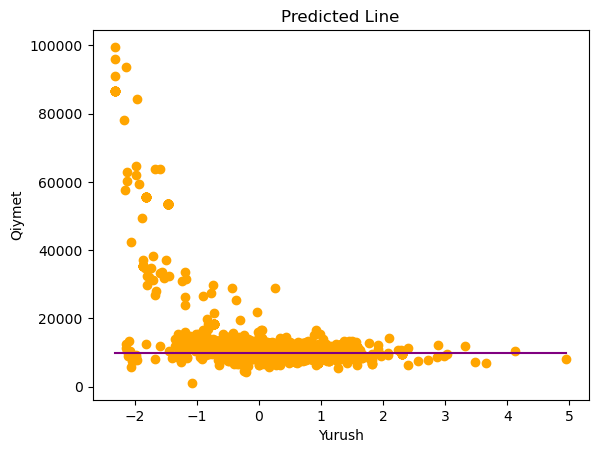

In [25]:
yurush_prediction(x_no, y)

### Line of predictions for Qiymet, Buraxilish ili, and Yurush


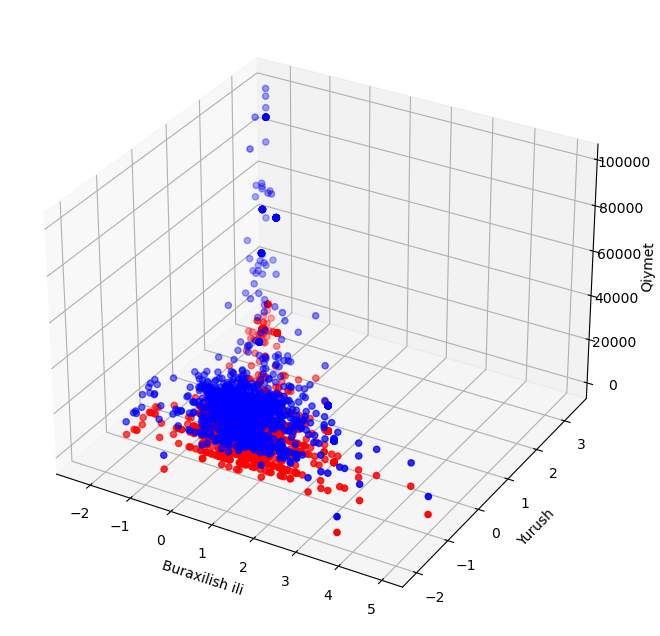

In [26]:
def scatter_predictions_3D(x, y, z):
    # Creating a figure
    fig = plt.figure(figsize = (12, 8)) 
    
    ax = fig.add_subplot(111, projection='3d') 
    ax.scatter(x[:, 1], x[:, 2], y, color="blue")
    ax.scatter(x[:, 1], x[:, 2], np.matmul(x, theta), color='red') 
    
    ax.set_xlabel('Buraxilish ili')  # Setting axes 
    ax.set_ylabel('Yurush') 
    ax.set_zlabel('Qiymet') 
    plt.show()

scatter_predictions_3D(x_no, y, alt)

# Two new cars 🚗🚙

In [27]:
car_1 = np.array([240000, 2000])
car_2 = np.array([415558, 1996])

In [28]:
normal_car_1 = (car_1 - mean) / sigma
normal_car_2 = (car_2 - mean) / sigma

In [29]:
normal_car_1 = np.concatenate(([1], normal_car_1))
normal_car_2 = np.concatenate(([1], normal_car_2))

In [30]:
price_car_1 = np.matmul(normal_car_1, alt)
price_car_2 = np.matmul(normal_car_2, alt)

In [31]:
print("  Actual price for car 1: 11500 AZN -> " + "Predicted price: " + str(int(price_car_1)) + " AZN")  
print("  Actual price for car 2: 8800 AZN -> "+ "Predicted price: " + str(int(price_car_2)) + " AZN")  

  Actual price for car 1: 11500 AZN -> Predicted price: 15840 AZN
  Actual price for car 2: 8800 AZN -> Predicted price: 5425 AZN


# Linear Regreassion using Library

In [32]:
features = data[['Buraxilish ili', 'Yurush']].to_numpy() 
target = data['Qiymet'].to_numpy()

In [33]:
# for cross-validation
kf = KFold(n_splits=10)

regressor = LinearRegression()

In [34]:
for train_indices, test_indices in kf.split(features):
    train_x, test_x = features[train_indices], features[test_indices]
    train_y, test_y = target[train_indices], target[test_indices]
    
    regressor.fit(train_x, train_y)
    
    r_squared = regressor.score(test_x, test_y)
    
    print(r_squared)

0.7923283622883481
0.7819012125617574
0.8365769776417284
0.8001962675284301
0.7517741559390332
0.7596655470962816
0.7605172587222135
0.7764165846776319
0.7505623419709726
0.8145082382153261


In [35]:
car_1_price = regressor.predict([[2000, 240000]])
car_2_price = regressor.predict([[1996, 415558]])

In [36]:
print("Predicted price for car 1: " + str(car_1_price) + " AZN" + "  Actual price: 11500 AZN")  
print("Predicted price for car 2: " + str(car_2_price) + " AZN" + "  Actual price: 8800 AZN") 

Predicted price for car 1: [15710.98031657] AZN  Actual price: 11500 AZN
Predicted price for car 2: [5539.89014912] AZN  Actual price: 8800 AZN
